In [35]:
import numpy as np
%matplotlib inline
import scipy as sc
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import ticker
from matplotlib.patches import Ellipse
from matplotlib.lines import Line2D



def plot_cov_ellipse(cov, pos, nstd=2, ax=None, **kwargs):
    if ax is None:
        ax = plt.gca()
    a = np.sqrt((cov[0,0]+cov[1,1])/2. + np.sqrt((cov[0,0]-cov[1,1])**2/4. + cov[0,1]**2))
    b = np.sqrt((cov[0,0]+cov[1,1])/2. - np.sqrt((cov[0,0]-cov[1,1])**2/4. + cov[0,1]**2))
    theta = np.degrees(np.arctan2(2*cov[0,1],cov[0,0]-cov[1,1]))/2
    alphas = np.asarray((2.3,6.17,11.8))
    alpha = np.sqrt(alphas[nstd-1]) 
    # Width and height are "full" widths, not radius
    ellip = Ellipse(xy=pos, width=2*alpha*a, height=2*alpha*b, angle=theta, **kwargs)
    ax.add_artist(ellip)
    return ellip

def plot_triangular(fisher_list, parameter_list, center_list, delta_list):
    n_params = len(parameter_list) #You need to make sure your parameters are in the same order as in your fisher matrix
    names = {'H0':r'$H_0$','A_s':r'$A_s$','109A_s':r'$10^9 A_s$','ln10A_s':r'$\ln(10^{10}a_s)$',
    'N_eff':r'$N_{eff}$','Y_He':r'$Y_{He}$','ombh2':r'$\Omega_bh^2$','omch2':r'$\Omega_ch^2$',
    'theta_MC':r'$\theta_{MC}$','n_s':r'$n_s$','tau':r'$\tau$','fde_zc':r'$fde_{zc}$', 'zc':r'$zc$', 'theta_i':r'$\theta_{i}$'} #Add EDE parameters, this is just nicely written names 
    #plt.rc('text', usetex = True) 
    covariance = np.linalg.inv(fisher_list) #the covariance matrix is the inverse of the fisher
    fig,axs = plt.subplots(n_params,n_params, figsize=(20,10))#, dpi=500)
    plt.subplots_adjust(wspace=0, hspace=0,left=0.1,right=0.98,top = 0.98,bottom=0.1)
    for i in range(n_params):
        for j in range(i+1):
            if i != j:
                cov_rayleigh = covariance[0][np.ix_([j,i],[j,i])]
                cov_normal = covariance[1][np.ix_([j,i],[j,i])]
                e1 = plot_cov_ellipse(cov_rayleigh,[center_list[j],center_list[i]],ax=axs[i,j],nstd = 1,lw = 2, fc = 'None',alpha = 1, ec = 'b')
                e2 = plot_cov_ellipse(cov_normal,[center_list[j],center_list[i]],ax=axs[i,j],nstd = 1,lw = 2, fc = 'None',alpha = 1, ec = 'r')

                axs[i,j].scatter(center_list[j],center_list[i], c = 'r', marker = '+')
                axs[i,j].grid(color='k', linestyle = '-.', linewidth = 0.5, alpha = 0.5)
                axs[i,j].set_xlim(center_list[j]-delta_list[j], center_list[j]+delta_list[j])
                axs[i,j].set_ylim(center_list[i]-delta_list[i], center_list[i]+delta_list[i])
                axs[i,j].xaxis.set_ticks(np.linspace(center_list[j]-delta_list[j], center_list[j]+delta_list[j],5))
                axs[i,j].tick_params(axis='x', rotation=-45)
                axs[i,j].yaxis.set_ticks(np.linspace(center_list[i]-delta_list[i], center_list[i]+delta_list[i],5))
                for label in axs[i,j].xaxis.get_ticklabels()[::2]:
                    label.set_visible(False)
                for label in axs[i,j].yaxis.get_ticklabels()[::2]:
                    label.set_visible(False)
                fig.delaxes(axs[j,i]) #delete unused plots
                
            else: 
                xx = np.linspace(center_list[i]-6*delta_list[i], center_list[i]+6*delta_list[i], 2000)
                yy_rayleigh = np.exp(-(xx-center_list[i])**2/(2*covariance[0][i,i]))
                yy_normal = np.exp(-(xx-center_list[i])**2/(2*covariance[1][i,i]))

                axs[i,j].plot(xx,yy_rayleigh, lw = 2, color = 'b')
                axs[i,j].plot(xx,yy_normal, lw = 2, color = 'r')
                axs[i,j].grid(color='k', linestyle = '-.', linewidth = 0.5, alpha = 0.5)
                axs[i,j].xaxis.set_ticks(np.linspace(center_list[j]-delta_list[j],center_list[j]+delta_list[j],5))
                axs[i,j].tick_params(axis='x', rotation=-45)
                axs[i,j].set_xlim(center_list[j]-delta_list[j], center_list[j]+delta_list[j])
                axs[i,j].set_ylim(0,1)
                for label in axs[i,j].xaxis.get_ticklabels()[::2]:
                    label.set_visible(False)
            axs[i,j].tick_params('both', labelsize = 14)
            axs[0,0].set_yticklabels([])
            axs[n_params-1,j].set_xlabel(names[parameter_list[j]], fontsize = 19)
            x_formatter = ticker.ScalarFormatter(useOffset=True)
            x_formatter.set_scientific(True)
            axs[n_params-1,j].xaxis.set_major_formatter(x_formatter)
            if i != n_params-1 :
                axs[i,j].set_xticklabels([])
            if j != 0 :
                axs[i,j].set_yticklabels([])
            if i != 0:
                axs[i,0].set_ylabel(names[parameter_list[i]], fontsize = 19)
                y_formatter = ticker.ScalarFormatter(useOffset=True)
                y_formatter.set_scientific(True)
                axs[i,0].yaxis.set_major_formatter(y_formatter)
    line1 = Line2D([0], [0], label='Rayleigh scaled 555 + 555 GHz PICO Noise', color='b') #Rayleigh scaled 555 + 555 GHz PICO Noise
    line2 = Line2D([0], [0], label='Thomson + 90 GHz PICO Noise', color='r')
    handles = ([line1, line2])
    fig.legend(handles =handles,  loc='upper center',  prop = { "size": 20 })
    #plt.tight_layout()
    plt.show()

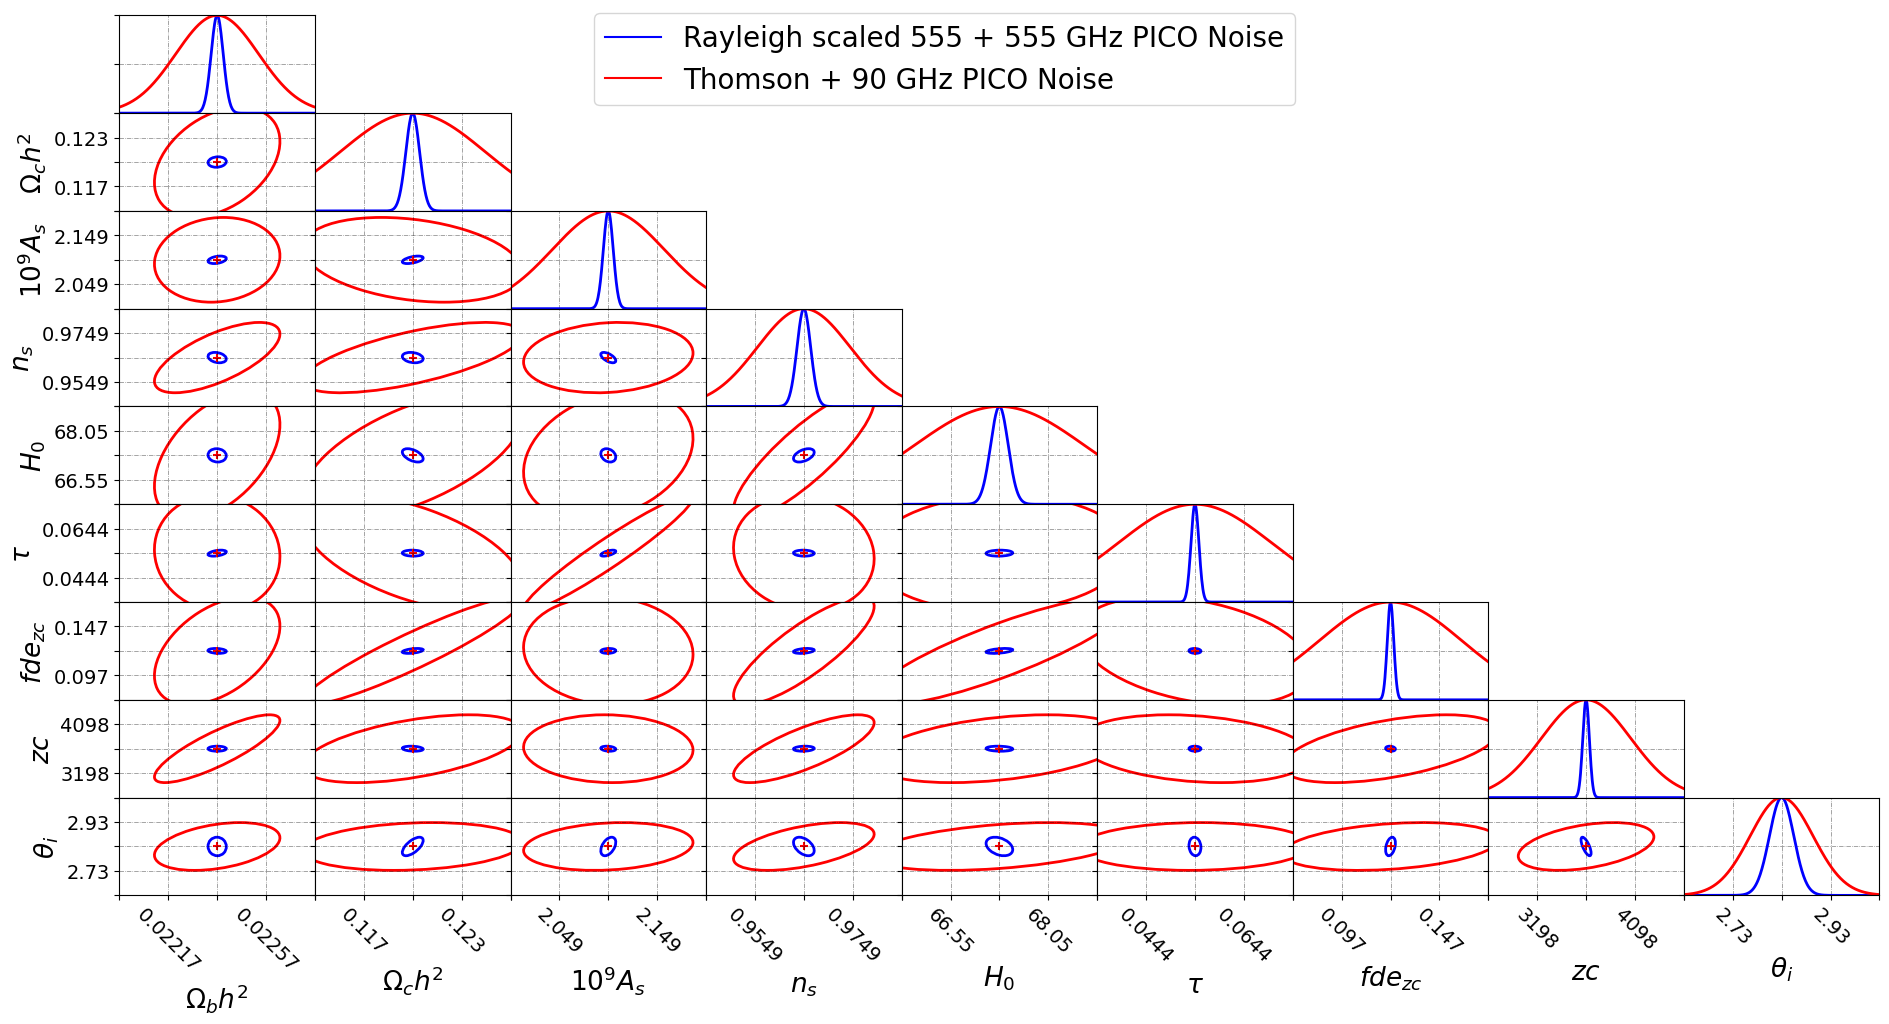

In [72]:
plot_triangular(np.array([Fishermatrix_Rayleigh_noise, Fishermatrix_thomson_noise]), param_list, param_values, param_width)

In [71]:
# 5e1, 5e1, 2e1, 2e1, 1e3, 2e1, 1e3, 5e2, 5e1
ombh2_val = 0.02237
ombh2_step = 4e-4/1
omch2_val = 0.120
omch2_step = 6e-3/1
ten9_As_val = 2.099#/ 1e9
As_step = 0.1/1 #/ 1e9
ns_val = 0.9649
ns_step = 0.02 /1
H0_val = 67.3
H0_step = 1.5/1
tau_val = 0.0544
tau_step = 0.02/1
fde_zc_val = 0.122
fde_zc_step = 0.05/1
zc_val = 10**(3.562)
zc_step = 900/1
theta_i_val = 2.83
theta_i_step = 0.1/0.5

Fishermatrix_thomson_noise = np.array([[ 1.10896322e+09, -2.29414030e+08,  1.81530776e+07,
         4.38565326e+07, -6.33336446e+05, -7.46703198e+07,
         3.12431311e+07, -1.04437278e+03, -9.74570659e+05],
       [-2.29414030e+08,  7.04585416e+07, -5.08487609e+06,
        -9.44783802e+06,  1.71865160e+05,  2.10351477e+07,
        -9.69546201e+06,  2.31984060e+02,  2.59642133e+05],
       [ 1.81530776e+07, -5.08487609e+06,  6.38056632e+05,
         1.14444802e+06, -1.15038357e+04, -2.64220759e+06,
         4.86490764e+05, -2.36622521e+01, -3.67880577e+04],
       [ 4.38565326e+07, -9.44783802e+06,  1.14444802e+06,
         2.61190906e+06, -2.49548168e+04, -4.72412791e+06,
         9.61756691e+05, -5.30640578e+01, -6.89518200e+04],
       [-6.33336446e+05,  1.71865160e+05, -1.15038357e+04,
        -2.49548168e+04,  4.49528127e+02,  4.73383293e+04,
        -2.47194462e+04,  6.12844269e-01,  5.78635475e+02],
       [-7.46703198e+07,  2.10351477e+07, -2.64220759e+06,
        -4.72412791e+06,  4.73383293e+04,  1.09507536e+07,
        -2.00385876e+06,  9.76034742e+01,  1.52430404e+05],
       [ 3.12431311e+07, -9.69546201e+06,  4.86490764e+05,
         9.61756691e+05, -2.47194462e+04, -2.00385876e+06,
         1.51114803e+06, -2.72091285e+01, -2.12472686e+04],
       [-1.04437278e+03,  2.31984060e+02, -2.36622521e+01,
        -5.30640578e+01,  6.12844269e-01,  9.76034742e+01,
        -2.72091285e+01,  1.15716619e-03,  1.34100787e+00],
       [-9.74570659e+05,  2.59642133e+05, -3.67880577e+04,
        -6.89518200e+04,  5.78635475e+02,  1.52430404e+05,
        -2.12472686e+04,  1.34100787e+00,  2.52079009e+03]])

Fishermatrix_Rayleigh_noise = np.array([[ 5.14222525e+09, -9.71206519e+08,  1.96345519e+07,
        -1.73409986e+08, -6.15930581e+06, -1.70943348e+08,
         5.18844472e+08, -2.19972070e+04, -3.85955426e+07],
       [-9.71206519e+08,  3.18514918e+08, -5.41396547e+06,
         6.48577649e+07,  2.07223706e+06,  4.41463643e+07,
        -1.75222949e+08,  7.47040877e+03,  1.31681923e+07],
       [ 1.96345519e+07, -5.41396547e+06,  6.42355629e+05,
         1.06034884e+06, -1.34106568e+04, -2.68802535e+06,
         6.78973429e+05, -3.06643611e+01, -5.01009621e+04],
       [-1.73409986e+08,  6.48577649e+07,  1.06034884e+06,
         2.50387065e+07,  5.49873019e+05,  2.12389824e+06,
        -4.89129222e+07,  2.13740064e+03,  3.83135501e+06],
       [-6.15930581e+06,  2.07223706e+06, -1.34106568e+04,
         5.49873019e+05,  1.52235610e+04,  2.22501353e+05,
        -1.30508145e+06,  5.67511350e+01,  1.00747910e+05],
       [-1.70943348e+08,  4.41463643e+07, -2.68802535e+06,
         2.12389824e+06,  2.22501353e+05,  1.50775720e+07,
        -1.73442579e+07,  7.71178449e+02,  1.35333866e+06],
       [ 5.18844472e+08, -1.75222949e+08,  6.78973429e+05,
        -4.89129222e+07, -1.30508145e+06, -1.73442579e+07,
         1.12995208e+08, -4.89638228e+03, -8.71115710e+06],
       [-2.19972070e+04,  7.47040877e+03, -3.06643611e+01,
         2.13740064e+03,  5.67511350e+01,  7.71178449e+02,
        -4.89638228e+03,  2.16406483e-01,  3.83481131e+02],
       [-3.85955426e+07,  1.31681923e+07, -5.01009621e+04,
         3.83135501e+06,  1.00747910e+05,  1.35333866e+06,
        -8.71115710e+06,  3.83481131e+02,  6.83704985e+05]])







Fishermatrix_rayleigh = np.array([[ 6.16913999e+09, -1.21076275e+09,  9.90888332e+07,
         2.48779744e+08, -3.44810172e+06, -4.05651953e+08,
         1.59976978e+08, -5.74925265e+03, -5.74294682e+06],
       [-1.21076275e+09,  3.39367804e+08, -2.49387372e+07,
        -5.01345619e+07,  8.64056138e+05,  1.02748345e+08,
        -4.63078875e+07,  1.19889742e+03,  1.33831003e+06],
       [ 9.90888332e+07, -2.49387372e+07,  3.05371540e+06,
         5.89870436e+06, -6.07140634e+04, -1.25978908e+07,
         2.43427955e+06, -1.21778285e+02, -1.81093034e+05],
       [ 2.48779744e+08, -5.01345619e+07,  5.89870436e+06,
         1.39500766e+07, -1.38606436e+05, -2.42454688e+07,
         5.15747629e+06, -2.84637633e+02, -3.66561405e+05],
       [-3.44810172e+06,  8.64056138e+05, -6.07140634e+04,
        -1.38606436e+05,  2.33443795e+03,  2.48803342e+05,
        -1.21467329e+05,  3.29843777e+00,  3.27406680e+03],
       [-4.05651953e+08,  1.02748345e+08, -1.25978908e+07,
        -2.42454688e+07,  2.48803342e+05,  5.20196361e+07,
        -9.98719269e+06,  5.00198910e+02,  7.47144177e+05],
       [ 1.59976978e+08, -4.63078875e+07,  2.43427955e+06,
         5.15747629e+06, -1.21467329e+05, -9.98719269e+06,
         7.12533637e+06, -1.39148555e+02, -1.15335870e+05],
       [-5.74925265e+03,  1.19889742e+03, -1.21778285e+02,
        -2.84637633e+02,  3.29843777e+00,  5.00198910e+02,
        -1.39148555e+02,  6.14232739e-03,  7.22415748e+00],
       [-5.74294682e+06,  1.33831003e+06, -1.81093034e+05,
        -3.66561405e+05,  3.27406680e+03,  7.47144177e+05,
        -1.15335870e+05,  7.22415748e+00,  1.24452031e+04]])


Fishermatrix_normal_rayleigh100 = np.array([[ 3.86346304e+09, -4.21120540e+08,  3.91462750e+07,
         1.92470769e+08, -4.87835229e+05, -1.36477424e+08,
         3.60550502e+07, -1.85100140e+03, -1.20509883e+07],
       [-4.21120540e+08,  1.45231981e+08, -7.73554548e+06,
         1.36548705e+07,  2.79243107e+05,  3.75402128e+07,
        -2.15378334e+07,  3.61220560e+02, -1.37509575e+06],
       [ 3.91462750e+07, -7.73554548e+06,  8.48427247e+05,
         1.33022862e+06, -1.10865301e+04, -3.52821845e+06,
         6.95728674e+05, -2.95964922e+01, -5.79415606e+04],
       [ 1.92470769e+08,  1.36548705e+07,  1.33022862e+06,
         3.23319348e+07,  4.39111031e+04,  6.32457833e+05,
        -4.98597445e+06, -4.62434521e+01, -2.22718725e+06],
       [-4.87835229e+05,  2.79243107e+05, -1.10865301e+04,
         4.39111031e+04,  6.93367545e+02,  5.96691888e+04,
        -4.88406768e+04,  7.55248694e-01, -4.24944609e+03],
       [-1.36477424e+08,  3.75402128e+07, -3.52821845e+06,
         6.32457833e+05,  5.96691888e+04,  1.60107808e+07,
        -4.16947734e+06,  1.24992281e+02, -2.08980724e+05],
       [ 3.60550502e+07, -2.15378334e+07,  6.95728674e+05,
        -4.98597445e+06, -4.88406768e+04, -4.16947734e+06,
         3.86070773e+06, -4.95312432e+01,  4.05988603e+05],
       [-1.85100140e+03,  3.61220560e+02, -2.95964922e+01,
        -4.62434521e+01,  7.55248694e-01,  1.24992281e+02,
        -4.95312432e+01,  2.08860023e-03,  2.22589799e+00],
       [-1.20509883e+07, -1.37509575e+06, -5.79415606e+04,
        -2.22718725e+06, -4.24944609e+03, -2.08980724e+05,
         4.05988603e+05,  2.22589799e+00,  1.68908183e+05]])

Fishermatrix_normal = np.array([[ 1.63185162e+09, -3.15817202e+08,  2.59508674e+07,
         6.46812113e+07, -8.85745979e+05, -1.06297253e+08,
         4.22011714e+07, -1.50791560e+03, -1.51625959e+06],
       [-3.15817202e+08,  8.61921601e+07, -6.30627289e+06,
        -1.26887034e+07,  2.17267267e+05,  2.59869476e+07,
        -1.18544963e+07,  3.06857234e+02,  3.40801419e+05],
       [ 2.59508674e+07, -6.30627289e+06,  7.63169017e+05,
         1.47462139e+06, -1.51104651e+04, -3.14888089e+06,
         6.30799056e+05, -3.08167207e+01, -4.55491365e+04],
       [ 6.46812113e+07, -1.26887034e+07,  1.47462139e+06,
         3.48787030e+06, -3.45147581e+04, -6.06238445e+06,
         1.34439648e+06, -7.20592553e+01, -9.22207691e+04],
       [-8.85745979e+05,  2.17267267e+05, -1.51104651e+04,
        -3.45147581e+04,  5.81181455e+02,  6.19341440e+04,
        -3.09019436e+04,  8.32486216e-01,  8.19187023e+02],
       [-1.06297253e+08,  2.59869476e+07, -3.14888089e+06,
        -6.06238445e+06,  6.19341440e+04,  1.30044425e+07,
        -2.58821849e+06,  1.26604739e+02,  1.87955753e+05],
       [ 4.22011714e+07, -1.18544963e+07,  6.30799056e+05,
         1.34439648e+06, -3.09019436e+04, -2.58821849e+06,
         1.82640478e+06, -3.64199162e+01, -3.04266614e+04],
       [-1.50791560e+03,  3.06857234e+02, -3.08167207e+01,
        -7.20592553e+01,  8.32486216e-01,  1.26604739e+02,
        -3.64199162e+01,  1.57477913e-03,  1.83965761e+00],
       [-1.51625959e+06,  3.40801419e+05, -4.55491365e+04,
        -9.22207691e+04,  8.19187023e+02,  1.87955753e+05,
        -3.04266614e+04,  1.83965761e+00,  3.14593157e+03]])

Fishermatrix_normal_noise = np.array([[ 6.59249427e+08, -1.54141777e+08,  1.13677234e+07,
         2.58875437e+07, -4.13171312e+05, -4.71710726e+07,
         2.16254999e+07, -6.43599788e+02, -5.06278594e+05],
       [-1.54141777e+08,  5.65216081e+07, -4.01584027e+06,
        -6.63479590e+06,  1.31599721e+05,  1.67047935e+07,
        -7.76084926e+06,  1.66647114e+02,  1.89185115e+05],
       [ 1.13677234e+07, -4.01584027e+06,  5.28993218e+05,
         8.57771363e+05, -8.33462278e+03, -2.20109559e+06,
         3.58904599e+05, -1.74365930e+01, -2.91611760e+04],
       [ 2.58875437e+07, -6.63479590e+06,  8.57771363e+05,
         1.85528832e+06, -1.66286864e+04, -3.56346577e+06,
         6.27247039e+05, -3.66352653e+01, -4.87935862e+04],
       [-4.13171312e+05,  1.31599721e+05, -8.33462278e+03,
        -1.66286864e+04,  3.32632465e+02,  3.45256353e+04,
        -1.91781321e+04,  4.20679341e-01,  3.69046022e+02],
       [-4.71710726e+07,  1.67047935e+07, -2.20109559e+06,
        -3.56346577e+06,  3.45256353e+04,  9.16488718e+06,
        -1.48759202e+06,  7.23932388e+01,  1.21537008e+05],
       [ 2.16254999e+07, -7.76084926e+06,  3.58904599e+05,
         6.27247039e+05, -1.91781321e+04, -1.48759202e+06,
         1.22565741e+06, -1.91009203e+01, -1.32338347e+04],
       [-6.43599788e+02,  1.66647114e+02, -1.74365930e+01,
        -3.66352653e+01,  4.20679341e-01,  7.23932388e+01,
        -1.91009203e+01,  7.95203141e-04,  9.08728633e-01],
       [-5.06278594e+05,  1.89185115e+05, -2.91611760e+04,
        -4.87935862e+04,  3.69046022e+02,  1.21537008e+05,
        -1.32338347e+04,  9.08728633e-01,  1.97755359e+03]])


Fishermatrix_scaled_555_noise555 = np.array([[ 3.55225818e+10, -1.36634285e+10,  3.86843501e+07,
        -4.23465771e+09, -1.05740741e+08, -8.90009108e+08,
         9.21567487e+09, -4.33560500e+05, -7.42352741e+08],
       [-1.36634285e+10,  6.26099841e+09, -1.39917947e+07,
         1.96866627e+09,  4.86340719e+07,  3.77793364e+08,
        -4.24406980e+09,  2.00249312e+05,  3.42537640e+08],
       [ 3.86843501e+07, -1.39917947e+07,  6.76040330e+05,
        -1.55413469e+06, -8.00436614e+04, -3.24480224e+06,
         6.43541390e+06, -3.04321970e+02, -5.16839675e+05],
       [-4.23465771e+09,  1.96866627e+09, -1.55413469e+06,
         6.35700820e+08,  1.54699460e+07,  1.08678715e+08,
        -1.35311315e+09,  6.39148582e+04,  1.09394617e+08],
       [-1.05740741e+08,  4.86340719e+07, -8.00436614e+04,
         1.54699460e+07,  3.79993527e+05,  2.83705933e+06,
        -3.31871613e+07,  1.56712862e+03,  2.68135172e+06],
       [-8.90009108e+08,  3.77793364e+08, -3.24480224e+06,
         1.08678715e+08,  2.83705933e+06,  3.38074628e+07,
        -2.45612451e+08,  1.15920988e+04,  1.98346936e+07],
       [ 9.21567487e+09, -4.24406980e+09,  6.43541390e+06,
        -1.35311315e+09, -3.31871613e+07, -2.45612451e+08,
         2.89931802e+09, -1.36905877e+05, -2.34263332e+08],
       [-4.33560500e+05,  2.00249312e+05, -3.04321970e+02,
         6.39148582e+04,  1.56712862e+03,  1.15920988e+04,
        -1.36905877e+05,  6.46820215e+00,  1.10673023e+04],
       [-7.42352741e+08,  3.42537640e+08, -5.16839675e+05,
         1.09394617e+08,  2.68135172e+06,  1.98346936e+07,
        -2.34263332e+08,  1.10673023e+04,  1.89391128e+07]])

Fishermatrix_scaled_268_noise268 = np.array([[ 1.23710879e+10,  2.57279649e+09,  2.21946834e+07,
         1.00406773e+09,  2.07725842e+07, -6.33302197e+08,
        -1.84902307e+09,  9.43753323e+04,  1.55926839e+08],
       [ 2.57279649e+09,  9.80121644e+08, -7.56271998e+06,
         2.77035720e+08,  6.88508776e+06, -1.26972045e+08,
        -5.94757900e+08,  2.97762036e+04,  4.87783171e+07],
       [ 2.21946834e+07, -7.56271998e+06,  7.65195229e+05,
         1.06868100e+06, -2.43370544e+04, -2.93889341e+06,
         1.44430005e+06, -7.15749138e+01, -1.12733463e+05],
       [ 1.00406773e+09,  2.77035720e+08,  1.06868100e+06,
         9.74335685e+07,  2.12805713e+06, -5.56994982e+07,
        -1.87656790e+08,  9.48621133e+03,  1.56161908e+07],
       [ 2.07725842e+07,  6.88508776e+06, -2.43370544e+04,
         2.12805713e+06,  5.03819031e+04, -1.08100354e+06,
        -4.38337942e+06,  2.20877478e+02,  3.62536696e+05],
       [-6.33302197e+08, -1.26972045e+08, -2.93889341e+06,
        -5.56994982e+07, -1.08100354e+06,  4.15362225e+07,
         9.72781630e+07, -4.93252343e+03, -8.12002636e+06],
       [-1.84902307e+09, -5.94757900e+08,  1.44430005e+06,
        -1.87656790e+08, -4.38337942e+06,  9.72781630e+07,
         3.82292752e+08, -1.92682746e+04, -3.16452104e+07],
       [ 9.43753323e+04,  2.97762036e+04, -7.15749138e+01,
         9.48621133e+03,  2.20877478e+02, -4.93252343e+03,
        -1.92682746e+04,  9.74475535e-01,  1.60065387e+03],
       [ 1.55926839e+08,  4.87783171e+07, -1.12733463e+05,
         1.56161908e+07,  3.62536696e+05, -8.12002636e+06,
        -3.16452104e+07,  1.60065387e+03,  2.63115676e+06]])

Fishermatrix_scaled_268 = np.array([[ 6.48225981e+10,  4.37535063e+08,  2.05279449e+08,
         1.51711862e+09,  3.38825163e+07, -1.22854986e+09,
         8.15065964e+09, -1.07975740e+05,  1.40466702e+08],
       [ 4.37535063e+08,  2.18371023e+09, -1.61342071e+07,
         5.34093658e+08,  1.55321584e+07, -1.31288486e+08,
        -1.82221992e+09,  6.11575736e+04,  9.93826239e+07],
       [ 2.05279449e+08, -1.61342071e+07,  1.51781698e+06,
         2.95713906e+06,  5.77790820e+03, -6.19237018e+06,
         4.17608231e+07, -8.13937931e+02, -2.05630551e+05],
       [ 1.51711862e+09,  5.34093658e+08,  2.95713906e+06,
         1.77455595e+08,  4.67571581e+06, -7.15591463e+07,
        -3.07055919e+08,  1.35790762e+04,  2.89571156e+07],
       [ 3.38825163e+07,  1.55321584e+07,  5.77790820e+03,
         4.67571581e+06,  1.29710441e+05, -1.65558108e+06,
        -9.92781733e+06,  4.01673581e+02,  8.04319466e+05],
       [-1.22854986e+09, -1.31288486e+08, -6.19237018e+06,
        -7.15591463e+07, -1.65558108e+06,  4.95788152e+07,
        -2.54518765e+07, -2.10198783e+03, -9.46796089e+06],
       [ 8.15065964e+09, -1.82221992e+09,  4.17608231e+07,
        -3.07055919e+08, -9.92781733e+06, -2.54518765e+07,
         3.81754423e+09, -8.71191584e+04, -8.38877171e+07],
       [-1.07975740e+05,  6.11575736e+04, -8.13937931e+02,
         1.35790762e+04,  4.01673581e+02, -2.10198783e+03,
        -8.71191584e+04,  2.43684606e+00,  2.90046569e+03],
       [ 1.40466702e+08,  9.93826239e+07, -2.05630551e+05,
         2.89571156e+07,  8.04319466e+05, -9.46796089e+06,
        -8.38877171e+07,  2.90046569e+03,  5.19700404e+06]])








param_list = np.array(['ombh2', 'omch2', '109A_s','n_s', 'H0','tau','fde_zc','zc','theta_i'])
param_values = np.array([ombh2_val, omch2_val, ten9_As_val, ns_val,H0_val,tau_val,fde_zc_val,zc_val,theta_i_val])
param_width =  np.array([ombh2_step, omch2_step, As_step, ns_step,H0_step,tau_step,fde_zc_step,zc_step,theta_i_step])
